In [1]:
import numpy as np

number_of_nodes = 20
Average_degree = 4
Total = number_of_nodes*Average_degree
Upper_boundary = 100

probs = np.full(number_of_nodes, 1.0/np.float64(number_of_nodes), dtype=np.float64) # probabilities

N = 10000 # samples to test
for k in range(N):
    q = np.random.multinomial(Total, probs)
    t = np.where(q > Upper_boundary) # check for out-of boundaries
    if np.any(t):
        continue
        
np.mean(q)

4.0

In [2]:
import networkx as nx

G = nx.random_degree_sequence_graph(q)

In [3]:
#[n for n in G.neighbors(26)]

In [4]:
list_edgees = []
list = [v for v in G.degree()]
for i in range(0, len(list)):
    list_edgees.append(list[i][1])
    
np.mean(list_edgees)

4.0

In [5]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, font_weight='bold')
plt.draw()

C:\Users\kacsk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [6]:
import random
from nxsim import BaseNetworkAgent

class Voter_model(BaseNetworkAgent):
    def __init__(self, environment=None, agent_id=None, state=()):
        super().__init__(environment=environment, agent_id=agent_id, state=state)
        self.convince_prob = 0.5
    
    def run(self):
        while True:
            self.id = random.randrange(number_of_nodes)
            print(self.id)
            self.convince()
            yield self.env.timeout(1)

    

    def convince(self):
        print("lala", self.id)
        anty_neighbors = self.get_neighboring_agents(state_id=-self.state['id'])
        for neighbor in anty_neighbors:
            if neighbor.id in self.global_topology.neighbors(self.id):
                
                self.remove_edge(self.id, neighbor.id)

                if random.random() < (1-self.convince_prob):               
                    self.state['id'] = neighbor.state['id']
                else:
                    for every_node in range(number_of_nodes):
                        new_edgee = random.randrange(number_of_nodes)
                        if new_edgee not in G.neighbors(self.id):
                            self.add_edge(self.id, new_edgee)
                        break
                    
                """    
                all_positive = self.get_all_agents(state_id = 1)
                for neighbor in all_positive:
                    for n in G.neighbors(neighbor.id):
                        if self.get_agent(n).state['id'] == 1:
                            print("+",neighbor.id, neighbor.state['id'], self.get_agent(n).id, self.get_agent(n).state['id'])
                            
                all_negative = self.get_all_agents(state_id = -1)
                for neighbor in all_negative:
                    for n in G.neighbors(neighbor.id):
                        if self.get_agent(n).state['id'] == -1:
                            print("-",neighbor.id, neighbor.state['id'], self.get_agent(n).id, self.get_agent(n).state['id'])
                """  
            break
                
    def add_edge(self, agent_id1, agent_id2, edge_attr_dict=None, *edge_attrs):
        if agent_id1 in self.global_topology.nodes(data=False):
            if agent_id2 in self.global_topology.nodes(data=False):
                self.global_topology.add_edge(agent_id1, agent_id2, edge_attr_dict=edge_attr_dict, *edge_attrs)
            else:
                raise ValueError('\'agent_id2\'[{}] not in list of existing agents in the network'.format(agent_id2))
        else:
            raise ValueError('\'agent_id1\'[{}] not in list of existing agents in the network'.format(agent_id1))
            
    def remove_edge(self, agent_id1, agent_id2):
        self.global_topology.remove_edge(agent_id1, agent_id2)

In [65]:
from nxsim import NetworkSimulation
from copy import deepcopy

init_states = [{'id': 1} for _ in range(number_of_nodes)]

for i in range(len(init_states)):
    if random.random() < 0.5:
        init_states[i] = {'id': -1}

sim = NetworkSimulation(topology=G, states=init_states, agent_type=Voter_model,
                        max_time=1, dir_path='sim_01', num_trials=1, logging_interval=1)

In [66]:
sim.run_simulation()

Starting simulations...
---Trial 0---
Setting up agents...
10
lala 10
1
lala 1
3
lala 3
12
lala 12
8
lala 8
10
lala 10
5
lala 5
8
lala 8
9
lala 9
6
lala 6
3
lala 3
4
lala 4
18
lala 18
13
lala 13
3
lala 3
5
lala 5
11
lala 11
8
lala 8
16
lala 16
15
lala 15
Written 1 items to pickled binary file: sim_01\log.0.state.pickled
Simulation completed.


In [67]:
from nxsim import BaseLoggingAgent
trial = BaseLoggingAgent.open_trial_state_history(dir_path='sim_01', trial_id=0)

In [68]:
tab = []
for i in range(len(init_states)):
    tab.append(trial[0][i])

In [69]:
len([i for i in range(len(tab)) if tab[i] != init_states[i]])

5

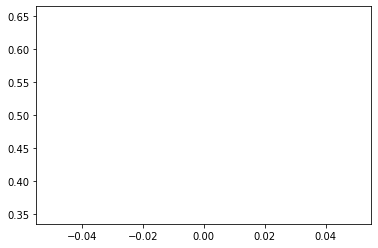

In [70]:
from matplotlib import pyplot as plt
ci_co_maja_1 = [sum([1 for node_id, state in g.items() if state['id'] == 1])/number_of_nodes for t,g in trial.items()]
ci_co_nie_maja_1 = [sum([1 for node_id, state in g.items() if state['id'] == -1])/number_of_nodes for t,g in trial.items()]

plt.plot(ci_co_maja_1)
plt.plot(ci_co_nie_maja_1)

plt.show()